#->Importación de librerias, limpieza y arreglo de tabla de datos

In [ ]:
#importar librerias
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
#import pycountry
import folium
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
from folium import plugins
from PIL import Image
from IPython.display import HTML
%matplotlib inline
sns.set()
# Graphics in retina format
%config InlineBackend.figure_format = 'retina'
# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 8, 5
# Disable warnings in Anaconda
import warnings
warnings.filterwarnings('ignore')
import os
#Cargamos el achivo para el analisis de datos con pandas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
dep=pd.read_csv("/content/drive/MyDrive/Proyecto/Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020).csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Vemos el tipo de información
print("Numero de columnas y filas:",dep.shape)
dep.info()

Numero de columnas y filas: (301, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.NO                  301 non-null    int64  
 1   Name                  301 non-null    object 
 2   Nationality           301 non-null    object 
 3   Current Rank          301 non-null    int64  
 4   Previous Year Rank    277 non-null    object 
 5   Sport                 301 non-null    object 
 6   Year                  301 non-null    int64  
 7   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 18.9+ KB


In [ ]:
#Vemos las primero 10 filas
dep.head(300)

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0
5,6,Jack Nicklaus,USA,6,NaN,golf,1990,8.6
6,7,Greg Norman,Australia,7,NaN,golf,1990,8.5
7,8,Michael Jordan,USA,8,NaN,basketball,1990,8.1
8,9,Arnold Palmer,USA,8,NaN,golf,1990,8.1
9,10,Evander Holyfield,USA,8,NaN,boxing,1990,8.1


In [ ]:
#Convertimos la columna "Year" a un tipo de datos datetime
dep_1 = dep.copy()
dep_1['Year'] = dep_1['Year'].apply(pd.to_datetime,format='%Y').dt.year
# Convertimos la columna "Sport" a Mayusculas
dep_1['Sport'] = dep_1['Sport'].str.upper()
# Convertimos la columna "Nationality" a Mayusculas
dep_1['Nationality'] = dep_1['Nationality'].str.upper()
dep_1.head(5)

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,BOXING,1990,28.6
1,2,Buster Douglas,USA,2,NaN,BOXING,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,BOXING,1990,13.0
3,4,Ayrton Senna,BRAZIL,4,NaN,AUTO RACING,1990,10.0
4,5,Alain Prost,FRANCE,5,NaN,AUTO RACING,1990,9.0


In [ ]:
#Cambiamos lo valores de la columna "Previous Year Rank" y declaramos NULL los valores no declarados
#El valor 200 es not ranking, lo puse asi para mayor facilidad de descriminar los otros datos
#Los demas datos los asigne con ese valor para la primera pregunta, estoy checando esa parte, pero no deberia ver problema con las demas pregunta
d = {'>10':'13','>20':'23', '>30':'31','>40':'41','>100':'113','?':'100','??':'100','none':'100','not ranked':'200'}
dep_1['Previous Year Rank']= dep_1['Previous Year Rank'].replace(d).astype(str).str.replace(r'\D+','0')
dep_1 = dep_1.replace(to_replace =['AUTO RACING', 'auto racing', 'Auto Racing (Nascar)'] , value= 'NASCAR')
dep_1 = dep_1.replace(to_replace = ['F1 MOTORSPORTS', 'F1 Motorsports'], value= 'F1 RACING')
dep_1=dep_1.drop(dep_1.index[[52]])
dep_1.head(191)

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,0,BOXING,1990,28.6
1,2,Buster Douglas,USA,2,0,BOXING,1990,26.0
2,3,Sugar Ray Leonard,USA,3,0,BOXING,1990,13.0
3,4,Ayrton Senna,BRAZIL,4,0,NASCAR,1990,10.0
4,5,Alain Prost,FRANCE,5,0,NASCAR,1990,9.0
5,6,Jack Nicklaus,USA,6,0,GOLF,1990,8.6
6,7,Greg Norman,AUSTRALIA,7,0,GOLF,1990,8.5
7,8,Michael Jordan,USA,8,0,BASKETBALL,1990,8.1
8,9,Arnold Palmer,USA,8,0,GOLF,1990,8.1
9,10,Evander Holyfield,USA,8,0,BOXING,1990,8.1


In [ ]:
dep_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.NO                  300 non-null    int64  
 1   Name                  300 non-null    object 
 2   Nationality           300 non-null    object 
 3   Current Rank          300 non-null    int64  
 4   Previous Year Rank    300 non-null    object 
 5   Sport                 300 non-null    object 
 6   Year                  300 non-null    int64  
 7   earnings ($ million)  300 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 21.1+ KB


#Programación Pregunta 1


1.Deportistas cuyo ranking ha subido al menos dos lugares entre 2010 y 2020.--------------------------------------------- Completo


In [ ]:
#Cambiamos el tipo de datos a int en la columna 'Previous Year Rank'
dep_1['Previous Year Rank']=dep_1['Previous Year Rank'].astype(int)

In [ ]:
dep_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.NO                  300 non-null    int64  
 1   Name                  300 non-null    object 
 2   Nationality           300 non-null    object 
 3   Current Rank          300 non-null    int64  
 4   Previous Year Rank    300 non-null    int64  
 5   Sport                 300 non-null    object 
 6   Year                  300 non-null    int64  
 7   earnings ($ million)  300 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 21.1+ KB


In [ ]:
dep_2 = dep_1.copy()

In [ ]:
#Especificamos del 2010 al 2020
data_2020 = dep_2[dep_2['Year']>= 2010]
data_2020 = data_2020[dep_2['Year']<= 2020]
data_2020


,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
191,192,Tiger Woods,USA,1,1,GOLF,2010,105.0
192,193,Floyd Mayweather,USA,2,13,BOXING,2010,65.0
193,194,Kobe Bryant,USA,3,2,BASKETBALL,2010,48.0
194,195,Phil Mickelson,USA,4,6,GOLF,2010,46.0
195,196,David Beckham,UK,5,5,SOCCER,2010,43.7
196,197,Roger Federer,SWITZERLAND,6,13,TENNIS,2010,43.0
197,198,LeBron James,USA,7,6,BASKETBALL,2010,42.8
198,199,Manny Pacquiao,PHILIPPINES,8,6,BOXING,2010,42.0
199,200,Eli Manning,USA,9,13,AMERICAN FOOTBALL,2010,39.9
200,201,Terrell Suggs,USA,10,13,AMERICAN FOOTBALL,2010,38.3


In [ ]:
#Se aplica una diferencia con la condición que solo muestre los nombres que se desplazaron por lo menos dos posiciones respecto al año pasado
df = pd.DataFrame({'Name':data_2020['Name'],'Year':data_2020['Year'],'Current Rank':data_2020['Current Rank'],'Previous Year Rank':data_2020['Previous Year Rank']})
df['Subio']=df['Previous Year Rank']-df['Current Rank']
p=df[df.Subio>=2]
p.style.background_gradient()

,Name,Year,Current Rank,Previous Year Rank,Subio
192,Floyd Mayweather,2010,2,13,11
194,Phil Mickelson,2010,4,6,2
196,Roger Federer,2010,6,13,7
199,Eli Manning,2010,9,13,4
200,Terrell Suggs,2010,10,13,3
203,LeBron James,2011,3,7,4
204,Roger Federer,2011,4,6,2
207,Cristiano Ronaldo,2011,7,13,6
208,Alex Rodriguez,2011,8,12,4
209,Michael Schumacher,2011,9,23,14


In [ ]:
p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 192 to 300
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Name                52 non-null     object
 1   Year                52 non-null     int64 
 2   Current Rank        52 non-null     int64 
 3   Previous Year Rank  52 non-null     int64 
 4   Subio               52 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 4.5+ KB


Text(0, 0.5, 'Rank')

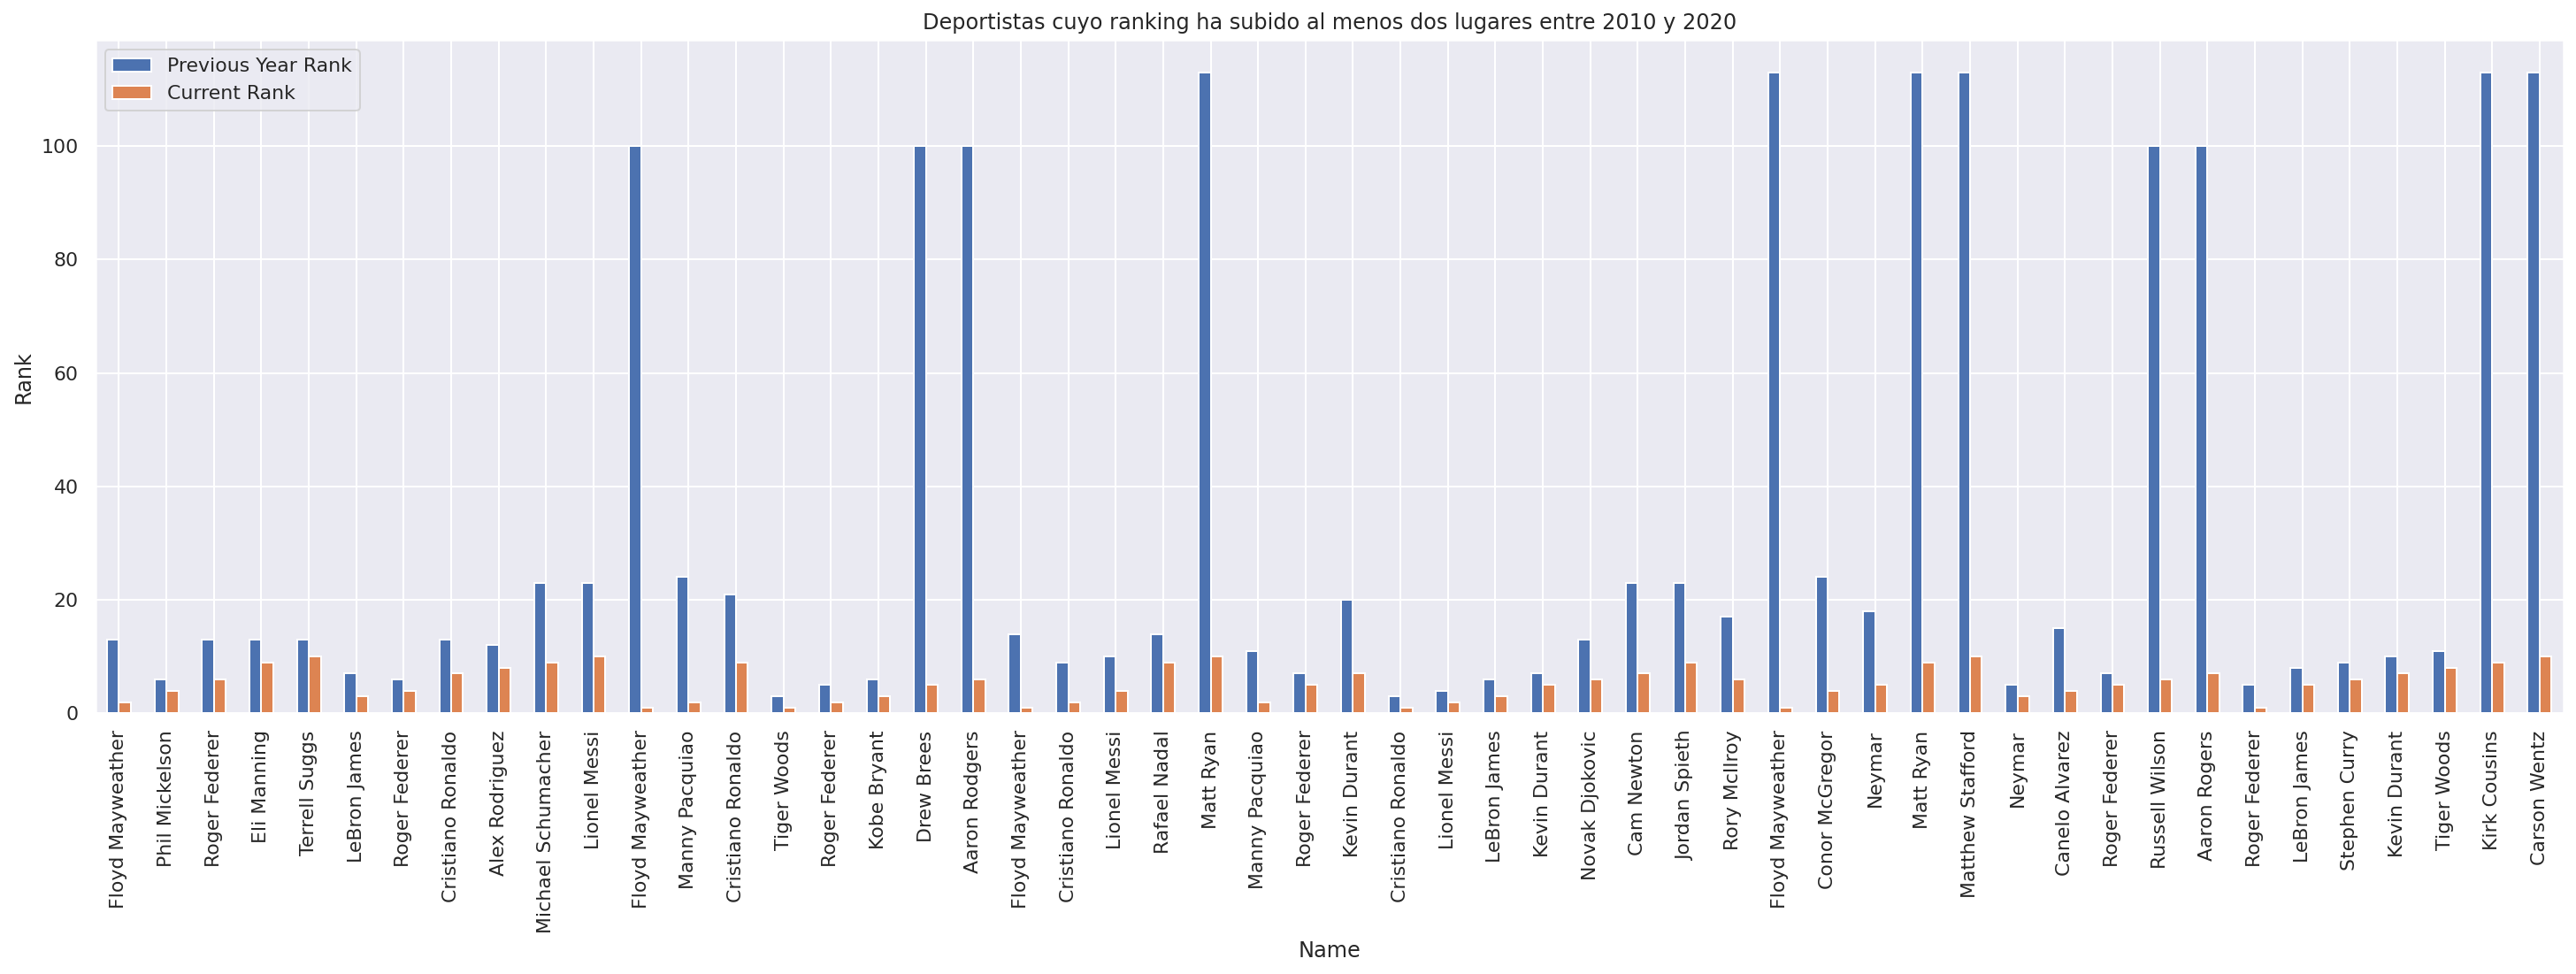

In [ ]:
#Grafica
df_g= pd.DataFrame({'Previous Year Rank':p['Previous Year Rank'],
                   'Current Rank':p['Current Rank'],'Person':p['Name']})
df_g=df_g.set_index('Person')
width = .35
df_g.plot.bar(rot=90, stacked=False, figsize=(25,7))
plt.title("Deportistas cuyo ranking ha subido al menos dos lugares entre 2010 y 2020")
plt.xlabel("Name")
plt.ylabel("Rank")



#Programación Pregunta 2

2. Atletas con mayor ingreso y minimo número de apariciones en la lista Forbes-----------------------------------------------------------------Completo

In [ ]:
#Atletas con menor numero de apariciones
conteo_atl= dep_2['Name'].value_counts().sort_index()
conteo_atl1=conteo_atl[conteo_atl==1] #colocamos la condicion que solo aparezca una vez


In [ ]:

#data_12

AttributeError: ignored

In [ ]:
Top_paid_each_year_89 = [dep_2['earnings ($ million)']>=0].sort_values(by='earnings ($ million)',ascending=False)
counts_up_89 = Top_paid_each_year_10[Top_paid_each_year_10['Name']==1].value_counts().to_frame()


AttributeError: ignored

In [ ]:
total_earnings = Top_paid_each_year_89.groupby('Sport')['earnings ($ million)'].sum().to_frame().reset_index()
top_ranks = Top_paid_each_year_89['Sport'].value_counts().to_frame().reset_index()
top_ranks.rename(columns={'index':'Sport',
                          'Sport':'Rank_counts'}, inplace=True)
df_compare89 = total_earnings.merge(top_ranks, on='Sport')
df_compare89.style.background_gradient(cmap='Reds')

In [ ]:
trace = go.Bar(
                    y = df_compare89['Sport'].sort_values(ascending=True) ,
                    x = df_compare89['earnings ($ million)'],
                    orientation='h',
                    marker = dict(color='pink',
                                 line=dict(color='black',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",title='Ganancia total por cada deporte por cada año',width=800, height=800,
                       xaxis= dict(title='Ganancias($ millones)'),
                       yaxis=dict(autorange="reversed"),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [ ]:
#Grafica Atletas con mayor ingreso y minimo número de apariciones en la lista Forbes
Top_paid_each_year_1 = dep_1[dep_1['earnings ($ million)']>=0].sort_values(by='earnings ($ million)',ascending=False)
counts_up = Top_paid_each_year_1['Name'].value_counts().to_frame()
trace = go.Bar(
                    y = counts_up[counts_up['Name']==1].index.sort_values(ascending=True) ,
                    x = dep_1['earnings ($ million)'],
                    orientation='h',
                    marker = dict(color='pink',
                                 line=dict(color='black',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",title='Atletas con mayor ingreso y minimo número de apariciones en la lista Forbes',width=800, height=800,
                       xaxis= dict(title='Ganancias($ millones)'),
                       yaxis=dict(autorange="reversed"),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)


#Programación Pregunta 3

3.Deporte y país con mayor número de atletas no rankeados que entraron en la lista de atletas mejor pagados------------------------------------------Prueba




In [ ]:
i=dep_1[dep_1['Previous Year Rank']==200] #El valor 200 es not ranking, lo puse asi para mayor facilidad de descriminar los otros datos
not_rank = i[['Name','Nationality','Sport','earnings ($ million)']]
not_rank.style.background_gradient(cmap='Reds')

,Name,Nationality,Sport,earnings ($ million)
51,Mike Tyson,USA,BOXING,40.000000
53,Riddick Bowe,USA,BOXING,22.200000
64,Emmit Smith,USA,NFL,16.500000
68,Dennis Rodman,USA,BASKETBALL,12.900000


#Programación Pregunta 4

4.País con mayor número de deportes con atletas en el dataset.-------------------------


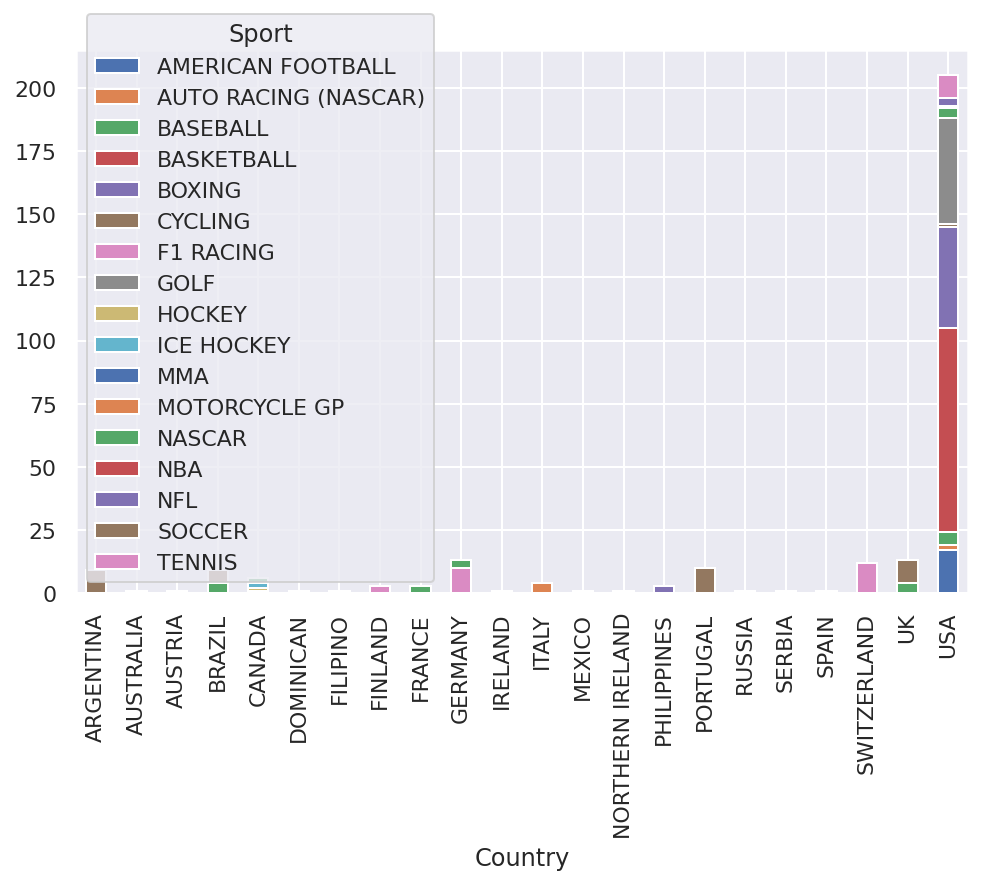

In [ ]:
country_1 = dep_1['Nationality']
sport_1 = dep_1['Sport']

c_s = pd.DataFrame({'Country' : country_1, 'Sport' : sport_1 })

c_s.groupby(['Country','Sport']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

#Programación Pregunta 5

5.¿Cuántos atletas por deporte tiene cada país?------------------------------------------------


In [ ]:
dep_1['Sport'].value_counts()

BASKETBALL              81
BOXING                  46
GOLF                    44
SOCCER                  33
TENNIS                  23
NASCAR                  21
AMERICAN FOOTBALL       17
F1 RACING               13
BASEBALL                 6
MOTORCYCLE GP            4
ICE HOCKEY               3
NFL                      3
AUTO RACING (NASCAR)     2
HOCKEY                   1
NBA                      1
CYCLING                  1
MMA                      1
Name: Sport, dtype: int64

In [ ]:
total_earnings_2 = Top_paid_each_year_1.groupby(['Nationality','Name'])['Sport'].max()
total_earnings_2


Nationality       Name                   
ARGENTINA         Lionel Messi                             SOCCER
AUSTRALIA         Greg Norman                                GOLF
AUSTRIA           Gerhard Berger                           NASCAR
BRAZIL            Ayrton Senna                             NASCAR
                  Neymar                                   SOCCER
                  Ronaldinho                               SOCCER
CANADA            Donovan "Razor" Ruddock                  BOXING
                  Jacques Villeneuve                       NASCAR
                  Joe Sakic                                HOCKEY
                  Wayne Gretzky                        ICE HOCKEY
DOMINICAN         Alex Rodriguez                         BASEBALL
FILIPINO          Manny Pacquiao                           BOXING
FINLAND           Kimi Raikkonen                        F1 RACING
FRANCE            Alain Prost                              NASCAR
GERMANY           Michael Schumach

#Programación Pregunta 6

6.Ganancia mínima y máxima (dentro del dataset) por deporte y por país.---------------------------


#Programación Pregunta 7

7.Atleta con mayores ganancias por deporte por década---------------------------------


In [ ]:
dep_3 = dep_1.copy()
dep_4 = dep_1.copy()
dep_5 = dep_1.copy()

In [ ]:
#Primera decada
data_10 = dep_3[dep_3['Year']>= 1990]
data_10 = data_10[dep_3['Year']<= 1999]
#data_10

In [ ]:
#Segunda decada
data_11 = dep_4[dep_4['Year']>= 2000]
data_11 = data_11[dep_4['Year']<= 2010]
#data_11

In [ ]:
data_12 = dep_5[dep_5['Year']>= 2011]
data_12 = data_12[dep_5['Year']<= 2020]
#data_12

In [ ]:
Top_paid_each_year_10 = data_10[data_10['earnings ($ million)']>=0].sort_values(by='earnings ($ million)',ascending=False)
counts_up_10 = Top_paid_each_year_10['Name'].value_counts().to_frame()


In [ ]:
#Atleta con mayores ganancias por década 2000-2010
Top_paid_each_year_11 = data_11[data_11['earnings ($ million)']>=1].sort_values(by='earnings ($ million)',ascending=False)
counts_up_11 = Top_paid_each_year_11['Name'].value_counts().to_frame()


In [ ]:
#Deporte con mayores ganancias por década 2000-2010
Top_paid_each_year_111 = data_11[data_11['earnings ($ million)']>=1].sort_values(by='Sport',ascending=False)
counts_up_111 = Top_paid_each_year_111['Sport'].value_counts().to_frame()


In [ ]:
#Atleta con mayores ganancias por década 2011-2020
Top_paid_each_year_12 = data_12[data_12['earnings ($ million)']>=1].sort_values(by='earnings ($ million)',ascending=False)
counts_up_12 = Top_paid_each_year_12['Name'].value_counts().to_frame()



In [ ]:
#Atleta con mayores ganancias por década 1990-1999
total_earnings_54 = Top_paid_each_year_10.groupby('Name')['earnings ($ million)'].sum().to_frame().reset_index()
top_ranks4 = Top_paid_each_year_10['Name'].value_counts().to_frame().reset_index()
top_ranks4.rename(columns={'index':'Name',
                          'Name':'Rank_counts'}, inplace=True)
df_compare1 = total_earnings_54.merge(top_ranks4, on='Name')
df_compare1.style.background_gradient(cmap='Reds')

,Name,earnings ($ million),Rank_counts
0,Alain Prost,36.000000,3
1,Andre Agassi,53.600000,4
2,Arnold Palmer,75.300000,6
3,Ayrton Senna,63.500000,4
4,Buster Douglas,26.000000,1
5,Cecil Fielder,12.700000,1
6,Dale Earnhardt,69.700000,3
7,Dennis Rodman,12.900000,1
8,"Donovan ""Razor"" Ruddock",10.200000,1
9,Emmit Smith,16.500000,1


In [ ]:
trace = go.Bar(
                    y = df_compare1['Name'].sort_values(ascending=True) ,
                    x = df_compare1['earnings ($ million)'],
                    orientation='h',
                    marker = dict(color='pink',
                                 line=dict(color='black',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",title='Atleta con mayores ganancias por década 1990-1999',width=800, height=800,
                       xaxis= dict(title='Ganancias($ millones)'),
                       yaxis=dict(autorange="reversed"),
                       showlegend=False)
fig_71 = go.Figure(data = data, layout = layout)
iplot(fig_71)

In [ ]:
#Deporte con mayores ganancias por década 1990-1999
total_earnings_55 = Top_paid_each_year_10.groupby('Sport')['earnings ($ million)'].sum().to_frame().reset_index()
top_ranks5 = Top_paid_each_year_10['Sport'].value_counts().to_frame().reset_index()
top_ranks5.rename(columns={'index':'Sport',
                          'Sport':'Rank_counts'}, inplace=True)
df_compare2 = total_earnings_55.merge(top_ranks5, on='Sport')
df_compare2.style.background_gradient(cmap='Reds')

,Sport,earnings ($ million),Rank_counts
0,BASEBALL,29.900000,2
1,BASKETBALL,634.900000,21
2,BOXING,749.800000,27
3,F1 RACING,106.000000,3
4,GOLF,239.900000,15
5,HOCKEY,17.900000,1
6,ICE HOCKEY,57.800000,3
7,NASCAR,281.500000,16
8,NBA,15.200000,1
9,NFL,37.500000,3


In [ ]:
trace = go.Bar(
                    y = df_compare2['Sport'].sort_values(ascending=True) ,
                    x = df_compare2['earnings ($ million)'],
                    orientation='h',
                    marker = dict(color='pink',
                                 line=dict(color='black',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",title='Deportes con mayores ganancias por década 1990-1999',width=800, height=800,
                       xaxis= dict(title='Ganancias($ millones)'),
                       yaxis=dict(autorange="reversed"),
                       showlegend=False)
fig_72 = go.Figure(data = data, layout = layout)
iplot(fig_72)

In [ ]:
#Atleta con mayores ganancias por década 1990-1999
total_earnings_58 = Top_paid_each_year_11.groupby('Name')['earnings ($ million)'].sum().to_frame().reset_index()
top_ranks8 = Top_paid_each_year_11['Name'].value_counts().to_frame().reset_index()
top_ranks8.rename(columns={'index':'Name',
                          'Name':'Rank_counts'}, inplace=True)
df_compare3 = total_earnings_58.merge(top_ranks8, on='Name')
df_compare3.style.background_gradient(cmap='Reds')

,Name,earnings ($ million),Rank_counts
0,Alex Rodriguez,81.200000,3
1,Andre Agassi,52.200000,2
2,Dale Earnhardt,24.500000,1
3,Dale Earnhardt Jr.,34.000000,1
4,David Beckham,229.200000,6
5,Eli Manning,39.900000,1
6,Floyd Mayweather,65.000000,1
7,Grant Hill,75.500000,3
8,Jacques Villeneuve,43.000000,2
9,Jeff Gordon,20.000000,1


In [ ]:
trace = go.Bar(
                    y = df_compare3['Name'].sort_values(ascending=True) ,
                    x = df_compare3['earnings ($ million)'],
                    orientation='h',
                    marker = dict(color='pink',
                                 line=dict(color='black',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",title='Atleta con mayores ganancias por década 2000-2010',width=800, height=800,
                       xaxis= dict(title='Ganancias($ millones)'),
                       yaxis=dict(autorange="reversed"),
                       showlegend=False)
fig_72 = go.Figure(data = data, layout = layout)
iplot(fig_72)

In [ ]:
#Deporte con mayores ganancias por década 2000-2010
total_earnings_56 = Top_paid_each_year_11.groupby('Sport')['earnings ($ million)'].sum().to_frame().reset_index()
top_ranks6 = Top_paid_each_year_11['Sport'].value_counts().to_frame().reset_index()
top_ranks6.rename(columns={'index':'Sport',
                          'Sport':'Rank_counts'}, inplace=True)
df_compare5 = total_earnings_56.merge(top_ranks6, on='Sport')
df_compare5.style.background_gradient(cmap='Reds')

,Sport,earnings ($ million),Rank_counts
0,AMERICAN FOOTBALL,186.700000,5
1,AUTO RACING (NASCAR),44.500000,2
2,BASEBALL,81.200000,3
3,BASKETBALL,1105.700000,34
4,BOXING,458.000000,12
5,CYCLING,28.000000,1
6,F1 RACING,505.000000,9
7,GOLF,1107.300000,15
8,MOTORCYCLE GP,128.000000,4
9,NASCAR,136.000000,4


In [ ]:
trace = go.Bar(
                    y = df_compare5['Sport'].sort_values(ascending=True) ,
                    x = df_compare5['earnings ($ million)'],
                    orientation='h',
                    marker = dict(color='pink',
                                 line=dict(color='black',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",title='Deporte con mayores ganancias por década 2000-2010',width=800, height=800,
                       xaxis= dict(title='Ganancias($ millones)'),
                       yaxis=dict(autorange="reversed"),
                       showlegend=False)
fig_73 = go.Figure(data = data, layout = layout)
iplot(fig_73)

In [ ]:
#Atleta con mayores ganancias por década 2011-2020
total_earnings_59 = Top_paid_each_year_12.groupby('Name')['earnings ($ million)'].sum().to_frame().reset_index()
top_ranks9 = Top_paid_each_year_12['Name'].value_counts().to_frame().reset_index()
top_ranks9.rename(columns={'index':'Name',
                          'Name':'Rank_counts'}, inplace=True)
df_compare4 = total_earnings_59.merge(top_ranks9, on='Name')
df_compare4.style.background_gradient(cmap='Reds')

,Name,earnings ($ million),Rank_counts
0,Aaron Rodgers,49.000000,1
1,Aaron Rogers,89.300000,1
2,Alex Rodriguez,35.000000,1
3,Andrew Luck,50.000000,1
4,Cam Newton,53.100000,1
5,Canelo Alvarez,94.000000,1
6,Carson Wentz,59.100000,1
7,Conor McGregor,99.000000,1
8,Cristiano Ronaldo,787.100000,10
9,David Beckham,133.200000,3


In [ ]:
trace = go.Bar(
                    y = df_compare4['Name'].sort_values(ascending=True) ,
                    x = df_compare4['earnings ($ million)'],
                    orientation='h',
                    marker = dict(color='pink',
                                 line=dict(color='black',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",title='Atleta con mayores ganancias por década 2011-2020',width=800, height=800,
                       xaxis= dict(title='Ganancias($ millones)'),
                       yaxis=dict(autorange="reversed"),
                       showlegend=False)
fig_74 = go.Figure(data = data, layout = layout)
iplot(fig_74)

In [ ]:
#Deporte con mayores ganancias por década 2011-2020
total_earnings_55 = Top_paid_each_year_12.groupby('Sport')['earnings ($ million)'].sum().to_frame().reset_index()
top_ranks5 = Top_paid_each_year_12['Sport'].value_counts().to_frame().reset_index()
top_ranks5.rename(columns={'index':'Sport',
                          'Sport':'Rank_counts'}, inplace=True)
df_compare6 = total_earnings_55.merge(top_ranks5, on='Sport')
df_compare6.style.background_gradient(cmap='Reds')

,Sport,earnings ($ million),Rank_counts
0,AMERICAN FOOTBALL,714.500000,12
1,BASEBALL,35.000000,1
2,BASKETBALL,1677.500000,26
3,BOXING,1091.000000,7
4,F1 RACING,34.000000,1
5,GOLF,789.300000,14
6,MMA,99.000000,1
7,NASCAR,46.000000,1
8,SOCCER,1926.300000,25
9,TENNIS,803.400000,12


In [ ]:
trace = go.Bar(
                    y = df_compare6['Sport'].sort_values(ascending=True) ,
                    x = df_compare6['earnings ($ million)'],
                    orientation='h',
                    marker = dict(color='pink',
                                 line=dict(color='black',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",title='Deportes con mayores ganancias por década 2011-2020',width=800, height=800,
                       xaxis= dict(title='Ganancias($ millones)'),
                       yaxis=dict(autorange="reversed"),
                       showlegend=False)
fig_75 = go.Figure(data = data, layout = layout)
iplot(fig_75)

#Programación Pregunta 8

8.Ganancia total por cada deporte por cada año-------------------------------------------------------Completo

In [ ]:
total_earnings = Top_paid_each_year_1.groupby('Sport')['earnings ($ million)'].sum().to_frame().reset_index()
top_ranks = Top_paid_each_year_1['Sport'].value_counts().to_frame().reset_index()
top_ranks.rename(columns={'index':'Sport',
                          'Sport':'Rank_counts'}, inplace=True)
df_compare = total_earnings.merge(top_ranks, on='Sport')
df_compare.style.background_gradient(cmap='Reds')

,Sport,earnings ($ million),Rank_counts
0,AMERICAN FOOTBALL,901.200000,17
1,AUTO RACING (NASCAR),44.500000,2
2,BASEBALL,146.100000,6
3,BASKETBALL,3418.100000,81
4,BOXING,2298.800000,46
5,CYCLING,28.000000,1
6,F1 RACING,645.000000,13
7,GOLF,2136.500000,44
8,HOCKEY,17.900000,1
9,ICE HOCKEY,57.800000,3


In [ ]:
trace = go.Bar(
                    y = df_compare['Sport'].sort_values(ascending=True) ,
                    x = df_compare['earnings ($ million)'],
                    orientation='h',
                    marker = dict(color='pink',
                                 line=dict(color='black',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",title='Ganancia total por cada deporte por cada año',width=800, height=800,
                       xaxis= dict(title='Ganancias($ millones)'),
                       yaxis=dict(autorange="reversed"),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)